# Installer libraries

In [1]:
!python.exe -m pip install --upgrade pip

In [2]:
!pip install pandas

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   --------- ------------------------------ 2.6/11.6 MB 16.7 MB/s eta 0:00:01
   -------------------- ------------------- 6.0/11.6 MB 16.1 MB/s eta 0:00:01
   ------------------------------ --------- 8.9/11.6 MB 15.0 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 14.9 MB/s eta 0:00:00


In [3]:
!pip install scikit-learn   

  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.0 MB 14.9 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.0 MB 16.8 MB/s eta 0:00:01
   ------------------------------------ --- 10.0/11.0 MB 17.2 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 15.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   -- ------------------------------------- 3.4/46.2 MB 16.7 MB/s eta 0:00:03
   ------ --------------------------------- 7.1/46.2 MB 16.7 MB/s eta 0:00:03
   --------- ------------------------------ 10.7/46.2 MB 17.7 MB/s eta 0:00:03
   ------------ --------------------------- 14.7/46.2 MB 17.7 MB/s eta 0:00:02
   --------------- ------------------------ 18.4/46.2 MB 17.5 MB/s eta 0:00:02
   ------------------- -------------------- 22.3/46.2 MB 17.8 MB/s eta 0:00:02
   --

In [4]:
!pip install tensorflow

   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 1.6/385.0 MB 13.9 MB/s eta 0:00:28
   ---------------------------------------- 2.4/385.0 MB 7.9 MB/s eta 0:00:49
   ---------------------------------------- 3.9/385.0 MB 7.3 MB/s eta 0:00:52
    --------------------------------------- 5.8/385.0 MB 7.7 MB/s eta 0:00:50
    --------------------------------------- 7.3/385.0 MB 7.8 MB/s eta 0:00:49
    --------------------------------------- 9.2/385.0 MB 8.0 MB/s eta 0:00:47
   - -------------------------------------- 11.0/385.0 MB 8.1 MB/s eta 0:00:47
   - -------------------------------------- 12.6/385.0 MB 8.0 MB/s eta 0:00:47
   - -------------------------------------- 14.2/385.0 MB 8.0 MB/s eta 0:00:47
   - -------------------------------------- 16.0/385.0 MB 8.1 MB/s eta 0:00:46
   - -------------------------------------- 17.8/385.0 MB 8.1 MB/s eta 0:00:46
   -- ------------------------------------- 19.4/385.0 MB 8.1 MB/

  You can safely remove it manually.
  You can safely remove it manually.


In [5]:
!pip install numpy

In [6]:
!pip install matplotlib

# Brug Panda til at læse (og vise) data fra csv-regnearket som indeholder træningsdata

In [7]:
import pandas as pd
#from sklearn.model_selection import train_test_split

df = pd.read_csv('data.csv')  # kan også læse excel filer med pd.read_excel()  ikke testet

Y = pd.get_dummies(df.drop(['X1','X2'], axis=1))  # Values
X = pd.get_dummies(df.drop(['Value test'], axis=1))  #  X1,X2

print(X)    #input til AI
print(Y)    # output fra AI

            X1        X2
0     4.015273  0.806483
1    -1.885671 -0.096012
2    -1.698679 -3.532364
3     1.810753  0.982904
4    -2.324976  3.636576
...        ...       ...
2395  0.176359  2.439269
2396  2.285077 -3.060542
2397 -0.634184  0.285939
2398  4.313096 -1.644443
2399  1.657631 -0.019839

[2400 rows x 2 columns]
      Value test
0             -1
1              1
2             -1
3              1
4             -1
...          ...
2395           1
2396          -1
2397           1
2398          -1
2399           1

[2400 rows x 1 columns]


# Byg nu efter bedste fornemmelse et neuralt netværk

In [8]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=2))          # 2 input til 6 neuroner i et skjult lag    # var input_dim=1))  
model.add(Dense(units=6, activation='relu'))          # 4 input til 6 neuroner i et skjult lag    # var input_dim=1))  
model.add(Dense(units=1, activation='linear'))  #sigmoid kan ikke bruges da positiv og negativ signal ønskes   1 output

model.compile(loss="mean_squared_error", optimizer='Adam')#, metrics='accuracy')  #sgd  loss='binary_crossentropy'/"mean_squared_error"




C:\Users\chr_v\Documents\eaa23itek\3semester\Kunstig-Intelligens\ai\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Konverter træningsdata til et array af float


In [9]:
import numpy as np

X_train = np.asarray(X).astype('float32')
y_train = np.asarray(Y).astype('float32')


In [10]:
X_train

array([[ 4.0152726 ,  0.80648327],
       [-1.8856708 , -0.096012  ],
       [-1.6986793 , -3.5323644 ],
       ...,
       [-0.6341844 ,  0.28593886],
       [ 4.313096  , -1.6444433 ],
       [ 1.6576308 , -0.01983912]], dtype=float32)

# Og træn med disse data

In [11]:
model.fit(X_train, y_train, epochs=400, batch_size=200)

Epoch 1/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 3.5467
Epoch 2/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9487 
Epoch 3/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7024 
Epoch 4/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3987 
Epoch 5/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0536 
Epoch 6/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9136 
Epoch 7/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7445 
Epoch 8/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6137 
Epoch 9/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4659 
Epoch 10/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3645 
Epoch 11/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2417 
Epoch 12/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1741 
Epoch 13/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0945 
Epoch 14/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0375 
Epoch 15/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss

In [12]:
Xtestdata  = np.array([[-6,-6]])
#print(Xtestdata )

for x1 in range (-5,5):
    for x2 in range(-5,5):
        Xtestdata = np.concatenate((Xtestdata,np.array([[x1,x2]])))



In [13]:
Ypredicted = model.predict(Xtestdata)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [14]:
Ypredicted[6]

array([-1.361693], dtype=float32)

In [15]:
print(Xtestdata[6,0])
print(Xtestdata[6,1])
type(Xtestdata[6,0])


-5
0


numpy.int32

# plot resultatet

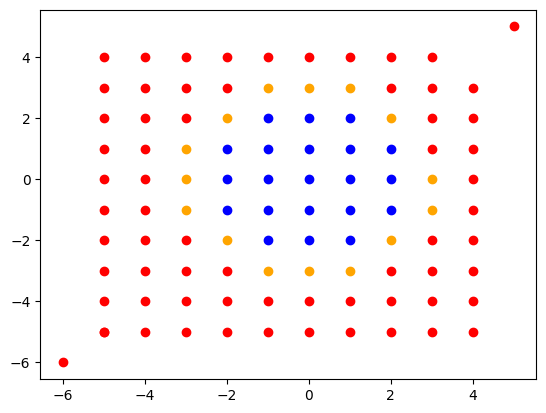

In [16]:
import matplotlib.pyplot as plt

plt.scatter(5,5,color='red') #marker
plt.scatter(-5,-5,color='red') #marker

for n in range (100):  #prøve-plot
    if Ypredicted[n] >= 0.25:
        c = 'blue' 
    else:
        if Ypredicted[n] <= -0.25:
            c = 'red'
        else:
            c = 'orange'
    #print(Xtestdata[n,0],Xtestdata[n,1],c)
    plt.scatter(Xtestdata[n,0],Xtestdata[n,1],color=c)
plt.show()  


A
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


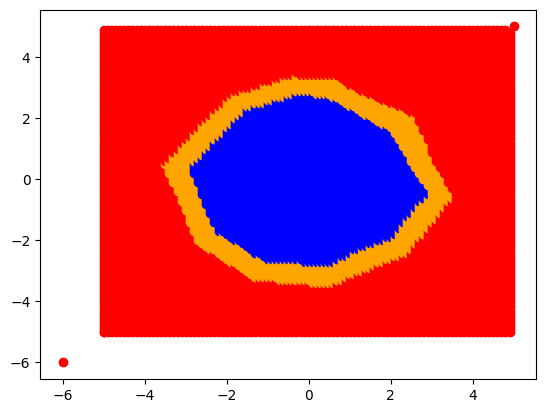

In [17]:
import matplotlib.pyplot as plt

print("A")

Xtestdata  = np.array([[-6,-6]])
#print(Xtestdata )

for x1 in range (-50,50):
    for x2 in range(-50,50):
        Xtestdata = np.concatenate((Xtestdata,np.array([[x1/10,x2/10]])))

Ypredicted = model.predict(Xtestdata)


plt.scatter(5,5,color='red') #marker
plt.scatter(-5,-5,color='red') #marker

for n in range (10000):  #prøve-plot
    if Ypredicted[n] >= 0.25:
        c = 'blue' 
    else:
        if Ypredicted[n] <= -0.25:
            c = 'red'
        else:
            c = 'orange'
    #print(Xtestdata[n,0],Xtestdata[n,1],c)
    plt.scatter(Xtestdata[n,0],Xtestdata[n,1],color=c)
plt.show()  
